# Analyse des données pour un système de prédiction

# Plan de travail 


##### 1. Contexte du projet
##### 2. Importer les librairies nécessaires 
##### 3. Préparation des données 
##### 4. Prétraitement des données
##### 5. Analyse exploratoire et visualisation des données

## Contexte du projet

Nous avons dans le dossier du dataset **SalesData** des données de ventes d'une entreprise sur l'année 2019, qui contient des fichiers de type CSV pour chaque mois.

Chaque fichier contient les colonnes suivantes:
* OrderID: l'identifiant unique de la commande
* Product: La désignation du produit
* Quantity Ordered: la quantité vendue
* Price each: le prix unitaire
* order date : La date d'achat
* Purchase adress: l'adresse de la boutique de vente

Notre travail est d'analyser ces données pour répondre aux questions suivantes:

* Quel est le meilleur mois de vente ? et Quel est le chiffre d'affaires de ce mois ?
* Dans quelle ville a-t-on le plus vendu de produits ?
* A quelle heure devons-nous passer de la publicité pour augmenter nos ventes ?
* Quels sont les produits qui sont souvent achetés ensemble ?
* Quel produit a-t-on le plus vendu et pourquoi ?
* Quel sont les produits à vendre le mois de janvier 2020 (prédiction : utilisation d'un algorithme de Machine Learning)

## Importer les librairies nécessaires 

In [6]:
# Le package du traitement et de l'analyse de donnees: PANDAS
import pandas as pd
# Le package de la visualisation graphique: MATPLOTLIB 
import matplotlib.pyplot as plt
# Le package qui est construit sur le dessus de la bib matplotlib et il est pour la visualisation graphique statistique des donnees
import seaborn as sns
# Le package de la manipulation des tableaus et des variables aleatoires: NUMPY
import numpy as np
# Le module OS qui fournit des fonctions pour interagir avec le système d’exploitation (pour lire notre dossier Sates_Data)
import os

## Préparation des données  
Ce terme désigne les opérations de l'affichage, nettoyage et transformation qui doivent etre appliquées aux données brutes avant leurs traitement et analyse, telles que la standarisation des formats (types) de données et enrichissement des données sources.

In [7]:
# Affecter le chemin du dossier a une variable
sales_data = "C:/Users/dell/Desktop/TOUT/SDAD M1/PYTHON/Sales_Data/"
# Utiliser la méthode os.listdir() pour obtenir la liste de tous les fichiers et répertoires dans le chemin spécifié.
os.listdir(sales_data)

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [8]:
# Jetons un coup d'oeil à la data d'un mois, celui d'Avril
avril_ventes = pd.read_csv(sales_data + "Sales_April_2019.csv")
# Afficher les premières lignes
avril_ventes.head()
# Utiliser la methode .info() obtenir un aperçu rapide de l’ensemble de données
avril_ventes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18383 entries, 0 to 18382
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          18324 non-null  object
 1   Product           18324 non-null  object
 2   Quantity Ordered  18324 non-null  object
 3   Price Each        18324 non-null  object
 4   Order Date        18324 non-null  object
 5   Purchase Address  18324 non-null  object
dtypes: object(6)
memory usage: 861.8+ KB


**PS**: Nous avons plusieurs autres sorties intéréssantes a vérifier, par exemple: 
* avril_ventes.describe() #Avoir un résumé statistique
* avril_ventes.columns #Afficher les colonnes existantes

## Prétraitement des données

In [9]:
# Créons une variable qui lit les fichiers de type csv et qui sont dans le dossier Sales_Data
fichiers = [fichier for fichier in os.listdir(sales_data) if fichier.endswith('.csv')]
fichiers
# Ensuite, on cree un DataFrame qui assemble toutes les données des fichiers dans un seul tableau à l'aide de la méthode .concat() 
df = pd.DataFrame()
for fichier in fichiers:
  donnees_terms = pd.read_csv(sales_data + fichier)
  df = pd.concat([df, donnees_terms])

In [10]:
# Voyons la dimension et l'aperçu du DataFrame crée
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


### a) Afficher les valeurs manquantes

In [11]:
# Afficher toutes les lignes qui ont au moins une valeur manquante
val_manquantes = df[df.isnull().any(axis=1)]
val_manquantes

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
10012,NaN,NaN,NaN,NaN,NaN,NaN
10274,NaN,NaN,NaN,NaN,NaN,NaN
10878,NaN,NaN,NaN,NaN,NaN,NaN
11384,NaN,NaN,NaN,NaN,NaN,NaN


**On pose la question: Est-ce que toutes les lignes n'ont que des valeurs manquantes?**

In [12]:
# On utilisera alors la méthode .isnull() en ajoutant .all() qui signifie afficher toutes les lignes
val_manquantes.isnull().all()

Order ID            True
Product             True
Quantity Ordered    True
Price Each          True
Order Date          True
Purchase Address    True
dtype: bool

**La réponse est: OUI**

### b) Suppression des valeurs manquantes 

In [13]:
df.dropna(inplace=True)
df.shape

(186305, 6)

In [14]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


**On remarque bien dans le résumé qu'il existe des valeurs abberantes "Les données qui ont un type différent; au-delà des normes attendues"**

### c) Supression des valeurs aberrantes

In [15]:
df_propres = df.drop(df.loc[df['Order Date'] == "Order Date", :].index)
df_propres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182735 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          182735 non-null  object
 1   Product           182735 non-null  object
 2   Quantity Ordered  182735 non-null  object
 3   Price Each        182735 non-null  object
 4   Order Date        182735 non-null  object
 5   Purchase Address  182735 non-null  object
dtypes: object(6)
memory usage: 9.8+ MB


**Voila voilou! On a supprimé 3570 valeurs abberantes**

### d) Standarisation des formats des données 

In [16]:
# D'abord, voyons les types des données de df_propres avant le changement 
df_propres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182735 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          182735 non-null  object
 1   Product           182735 non-null  object
 2   Quantity Ordered  182735 non-null  object
 3   Price Each        182735 non-null  object
 4   Order Date        182735 non-null  object
 5   Purchase Address  182735 non-null  object
dtypes: object(6)
memory usage: 9.8+ MB


In [17]:
df_propres['Quantity Ordered'] = df_propres['Quantity Ordered'].astype('int')
df_propres['Price Each'] = pd.to_numeric(df_propres['Price Each'])
df_propres['Order Date'] = pd.to_datetime(df_propres['Order Date'])

In [18]:
# df_propres apres le changement des types.
df_propres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182735 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          182735 non-null  object        
 1   Product           182735 non-null  object        
 2   Quantity Ordered  182735 non-null  int32         
 3   Price Each        182735 non-null  float64       
 4   Order Date        182735 non-null  datetime64[ns]
 5   Purchase Address  182735 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), object(3)
memory usage: 9.1+ MB


In [19]:
# Exemple: Voici à quoi ressemble le type des valeurs de la colonne [Order Date]
df_propres['Order Date']

0       2019-04-19 08:46:00
2       2019-04-07 22:30:00
3       2019-04-12 14:38:00
4       2019-04-12 14:38:00
5       2019-04-30 09:27:00
                ...        
11681   2019-09-17 20:56:00
11682   2019-09-01 16:00:00
11683   2019-09-23 07:39:00
11684   2019-09-19 17:30:00
11685   2019-09-30 00:18:00
Name: Order Date, Length: 182735, dtype: datetime64[ns]

In [20]:
df_propres.shape

(182735, 6)

## Analyse exploratoire et visualisation des données

### 1/ Quel est le meilleur mois de vente ? et Quel est le chiffre d'affaires de ce mois ?

In [21]:
df_propres.tail() #Afficher les dernieres lignes 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11681,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016"
11685,259357,USB-C Charging Cable,1,11.95,2019-09-30 00:18:00,"250 Meadow St, San Francisco, CA 94016"


In [22]:
#On rend la colonne Order Date comme index du DataFrame afin de lire les données de vente par leur date d'achat 
df_propres= df_propres.set_index('Order Date')
#Ensuite, on les trie par un ordre croissant, c-a-d du janvier au décembre
df_propres.sort_index(inplace=True)

In [23]:
#Puis, on crée une clolonne MOIS qui contient que les mois de l'index (de la date d'achat)
df_propres['Mois'] = df_propres.index.month_name()
#Enfin, afficher le tableau contenant la date comme index et la colonne Mois en addition 
df_propres.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Mois
Order Date,,,,,,
2019-01-01 03:07:00,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001",January
2019-01-01 03:40:00,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016",January
2019-01-01 04:56:00,149343,Apple Airpods Headphones,1,150.00,"735 5th St, New York City, NY 10001",January
2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001",January
2019-01-01 06:03:00,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301",January


* Faisons les mathématiques ! Pour calculer le chiffre d'affaire on multiplie la quantité vendue par le prix de chaque unité

Text(0.5, 1.0, "Chiffre d'affaire par mois")

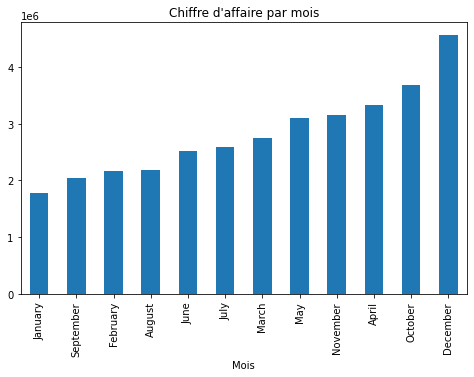

In [24]:
#En premier lieu, on crée une colonne Chiffre_daffaire puis faire la multiplication des deux listes qu'on a mentionné au-dessus 
df_propres['Chiffre_daffaire'] = df_propres['Quantity Ordered'] * df_propres['Price Each']
#En deuxieme lieu, on groupe les deux colonnes de 'chiffre_daffaire' et 'Mois' et faire la somme
df_propres.groupby('Mois')["Chiffre_daffaire"].sum()
#En dernier lieu, on distingue le meilleur mois de vente en faisons la visualisation des resultas de la somme par mois
df_propres.groupby('Mois')["Chiffre_daffaire"].sum().sort_values().plot.bar(figsize=(8,5))
plt.title("Chiffre d'affaire par mois")

* On voit bien que le meilleur mois de vente est le mois de **Décembre** et le chiffre realisé en 2019 est: **4557905,42 $**

### 2/ Dans quelle ville a-t-on le plus vendu de produits ?

In [25]:
# Afficher toutes les adresses des boutiques de vente 
df_propres['Purchase Address'].unique()

array(['9 Lake St, New York City, NY 10001',
       '760 Church St, San Francisco, CA 94016',
       '735 5th St, New York City, NY 10001', ...,
       '731 7th St, New York City, NY 10001',
       '754 Hickory St, New York City, NY 10001',
       '657 Spruce St, New York City, NY 10001'], dtype=object)

In [26]:
#On constate que les villes sont en deuxieme position, alors on supprime les vides apres chaque virgule; 
#On cree une fonction get_ville et utiliser la methode strip() pour la supression des espaces
def get_ville(adresse):
  return adresse.split(',')[1].strip()
#Exemple: Faire extraire que le nom de la ville d'une adresse complete 
get_ville("760 Church St, San Francisco, CA 94016")

'San Francisco'

In [27]:
#Apres cette derniere opération, on crée par la suite une colonne Ville pour insérer les noms des villes seulement
df_propres['Ville'] = df_propres['Purchase Address'].apply(get_ville)
df_propres.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Mois,Chiffre_daffaire,Ville
Order Date,,,,,,,,
2019-01-01 03:07:00,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001",January,11.99,New York City
2019-01-01 03:40:00,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016",January,11.95,San Francisco
2019-01-01 04:56:00,149343,Apple Airpods Headphones,1,150.00,"735 5th St, New York City, NY 10001",January,150.00,New York City
2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001",January,2.99,Dallas
2019-01-01 06:03:00,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301",January,23.90,Atlanta


In [28]:
df_propres['Ville'].unique()

array(['New York City', 'San Francisco', 'Dallas', 'Atlanta', 'Boston',
       'Seattle', 'Los Angeles', 'Portland', 'Austin'], dtype=object)

In [29]:
#De la meme methode precedante, on renvoie la ville où on a le plus vendu  
df_propres.groupby('Ville').sum()["Chiffre_daffaire"].sort_values(ascending=False)

Ville
San Francisco    8124120.94
Los Angeles      5354039.93
New York City    4581658.91
Boston           3604080.86
Atlanta          2741642.05
Dallas           2717793.72
Seattle          2693048.60
Portland         2276649.24
Austin           1786745.52
Name: Chiffre_daffaire, dtype: float64

* **San Francisco** est la ville où on a le plus vendu de produits en 2019 et avec un chiffre d'affaire de **8124120.94 $**

### 3/ A quelle heure devons-nous passer de la publicité pour augmenter nos ventes ?

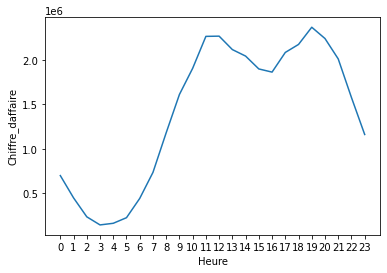

In [30]:
#On cree une autre colonne Heure qu'on trouve dans notre Index (PS: elle est dans le module datetime par defaut)
df_propres['Heure'] = df_propres.index.hour
heure_par_CA=df_propres.groupby('Heure')['Chiffre_daffaire'].sum().sort_values(ascending=False)
#Visualiser les resultats avec la bibliotheque SEABORN  
sns.lineplot(data=heure_par_CA)
plt.xticks(ticks=range(0, 24))
plt.show()

* Nous devrions passer de la publicité entre 10 et 11h et entre 18 et 19h.

### 4/ Quels sont les produits qui sont souvent achetés ensemble ?

In [31]:
#Ce sont les produits qui ont un meme ID 
df_m = df_propres[df_propres['Order ID'].duplicated(keep=False)].copy()
df_m
def concat_produit_par_order_id(p: list):
  return ";".join(p)

ensemble = df_m.groupby('Order ID')['Product'].apply(concat_produit_par_order_id)

from itertools import combinations
from collections import Counter
#creer une variable qui fait le comptage et la selection des collections 
count = Counter()

ensemble.to_list()

['USB-C Charging Cable;Wired Headphones',
 'Apple Airpods Headphones;AA Batteries (4-pack)',
 'Vareebadd Phone;Wired Headphones',
 'USB-C Charging Cable;Google Phone',
 'Bose SoundSport Headphones;Google Phone',
 'iPhone;Apple Airpods Headphones',
 'Google Phone;Apple Airpods Headphones',
 'Wired Headphones;iPhone;Apple Airpods Headphones',
 'USB-C Charging Cable;Apple Airpods Headphones',
 'Wired Headphones;Lightning Charging Cable',
 'iPhone;Lightning Charging Cable',
 'Bose SoundSport Headphones;27in FHD Monitor',
 'USB-C Charging Cable;Google Phone',
 'iPhone;Wired Headphones',
 'USB-C Charging Cable;Google Phone',
 'AA Batteries (4-pack);AAA Batteries (4-pack)',
 'Wired Headphones;Vareebadd Phone;USB-C Charging Cable',
 'USB-C Charging Cable;Google Phone',
 'Vareebadd Phone;Wired Headphones',
 'Lightning Charging Cable;34in Ultrawide Monitor',
 'USB-C Charging Cable;Wired Headphones',
 'Bose SoundSport Headphones;Lightning Charging Cable',
 'Wired Headphones;Google Phone',
 'Wired

In [32]:
for achat in ensemble.to_list():
    products = achat.split(';')

    print(products) # Afficher les produits vendus ensemble et qui sont separés par un point virgule
    count.update(Counter(combinations(products, 2)))

['USB-C Charging Cable', 'Wired Headphones']
['Apple Airpods Headphones', 'AA Batteries (4-pack)']
['Vareebadd Phone', 'Wired Headphones']
['USB-C Charging Cable', 'Google Phone']
['Bose SoundSport Headphones', 'Google Phone']
['iPhone', 'Apple Airpods Headphones']
['Google Phone', 'Apple Airpods Headphones']
['Wired Headphones', 'iPhone', 'Apple Airpods Headphones']
['USB-C Charging Cable', 'Apple Airpods Headphones']
['Wired Headphones', 'Lightning Charging Cable']
['iPhone', 'Lightning Charging Cable']
['Bose SoundSport Headphones', '27in FHD Monitor']
['USB-C Charging Cable', 'Google Phone']
['iPhone', 'Wired Headphones']
['USB-C Charging Cable', 'Google Phone']
['AA Batteries (4-pack)', 'AAA Batteries (4-pack)']
['Wired Headphones', 'Vareebadd Phone', 'USB-C Charging Cable']
['USB-C Charging Cable', 'Google Phone']
['Vareebadd Phone', 'Wired Headphones']
['Lightning Charging Cable', '34in Ultrawide Monitor']
['USB-C Charging Cable', 'Wired Headphones']
['Bose SoundSport Headphones

In [33]:
count
count.most_common(1) #most_common est dans le module de 'collections', elle trouve l'ensemble le plus commun de la liste des produits

[(('iPhone', 'Lightning Charging Cable'), 494)]

In [34]:
#Afficher 10 produits qui sont achetés ensembles 
for ensemble, c in count.most_common(10):
    print(ensemble, c)

('iPhone', 'Lightning Charging Cable') 494
('Lightning Charging Cable', 'iPhone') 489
('Google Phone', 'USB-C Charging Cable') 486
('USB-C Charging Cable', 'Google Phone') 480
('iPhone', 'Wired Headphones') 229
('Wired Headphones', 'iPhone') 223
('Google Phone', 'Wired Headphones') 213
('Wired Headphones', 'Google Phone') 197
('Vareebadd Phone', 'USB-C Charging Cable') 182
('iPhone', 'Apple Airpods Headphones') 181


### 5/ Quel produit a-t-on le plus vendu et pourquoi ?

In [35]:
df_propres.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)

Product
AAA Batteries (4-pack)        30487
AA Batteries (4-pack)         27148
USB-C Charging Cable          23555
Lightning Charging Cable      22841
Wired Headphones              20201
Apple Airpods Headphones      15383
Bose SoundSport Headphones    13236
27in FHD Monitor               7429
iPhone                         6732
27in 4K Gaming Monitor         6134
34in Ultrawide Monitor         6076
Google Phone                   5440
Flatscreen TV                  4724
Macbook Pro Laptop             4645
20in Monitor                   4058
ThinkPad Laptop                4054
Vareebadd Phone                2023
LG Washing Machine              649
LG Dryer                        640
Name: Quantity Ordered, dtype: int32

In [39]:
df_propres.groupby('Product')['Price Each'].unique().sort_values(ascending=True)

Product
AAA Batteries (4-pack)          [2.99]
AA Batteries (4-pack)           [3.84]
USB-C Charging Cable           [11.95]
Wired Headphones               [11.99]
Lightning Charging Cable       [14.95]
Bose SoundSport Headphones     [99.99]
20in Monitor                  [109.99]
27in FHD Monitor              [149.99]
Apple Airpods Headphones       [150.0]
Flatscreen TV                  [300.0]
34in Ultrawide Monitor        [379.99]
27in 4K Gaming Monitor        [389.99]
Vareebadd Phone                [400.0]
Google Phone                   [600.0]
LG Washing Machine             [600.0]
LG Dryer                       [600.0]
iPhone                         [700.0]
ThinkPad Laptop               [999.99]
Macbook Pro Laptop            [1700.0]
Name: Price Each, dtype: object

* Le produit le plus veundu est: AAA Batteries (4-pack) avec 30487 unités vendues
* Pourquoi ? On pourra estimer en raison de son bas prix. 

### 6/ Quel sont les produits à vendre le mois de janvier 2020 (prédiction : utilisation d'un algorithme de Machine Learning)

In [3]:
# Traitement des données
from sklearn.model_selection import train_test_split

# Pré-traitement des données
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Pour tester les performances des modèles utilisés
from sklearn import metrics

# Classification
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

### a/ Préparation des données

In [40]:
df_propres1=df_propres.copy()

In [41]:
df_propres1['Annee']=df_propres1.index.year

In [42]:
df_propres1

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Mois,Chiffre_daffaire,Ville,Heure,Annee
Order Date,,,,,,,,,,
2019-01-01 03:07:00,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001",January,11.99,New York City,3,2019
2019-01-01 03:40:00,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016",January,11.95,San Francisco,3,2019
2019-01-01 04:56:00,149343,Apple Airpods Headphones,1,150.00,"735 5th St, New York City, NY 10001",January,150.00,New York City,4,2019
2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001",January,2.99,Dallas,5,2019
2019-01-01 06:03:00,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301",January,23.90,Atlanta,6,2019
...,...,...,...,...,...,...,...,...,...,...
2020-01-01 04:13:00,304165,AAA Batteries (4-pack),1,2.99,"825 Adams St, Portland, OR 97035",January,2.99,Portland,4,2020
2020-01-01 04:21:00,299125,USB-C Charging Cable,1,11.95,"754 Hickory St, New York City, NY 10001",January,11.95,New York City,4,2020
2020-01-01 04:54:00,305840,Bose SoundSport Headphones,1,99.99,"784 River St, San Francisco, CA 94016",January,99.99,San Francisco,4,2020


In [43]:
# Supprimer les colonnes de types chaine de charactere et celles qui ne seront pas utiles pour notre question
df_propres1.drop(['Price Each','Purchase Address', 'Ville', 'Order ID', 'Heure'], inplace=True, axis=1)
df_propres1.head()

,Product,Quantity Ordered,Mois,Chiffre_daffaire,Annee
Order Date,,,,,
2019-01-01 03:07:00,Wired Headphones,1,January,11.99,2019
2019-01-01 03:40:00,USB-C Charging Cable,1,January,11.95,2019
2019-01-01 04:56:00,Apple Airpods Headphones,1,January,150.00,2019
2019-01-01 05:53:00,AAA Batteries (4-pack),1,January,2.99,2019
2019-01-01 06:03:00,USB-C Charging Cable,2,January,23.90,2019


In [45]:
# Re-indexer la copie de notre dataframe 
df_propres1.reset_index(level=0, inplace=True)
df_propres1

,Order Date,Product,Quantity Ordered,Mois,Chiffre_daffaire,Annee
0,2019-01-01 03:07:00,Wired Headphones,1,January,11.99,2019
1,2019-01-01 03:40:00,USB-C Charging Cable,1,January,11.95,2019
2,2019-01-01 04:56:00,Apple Airpods Headphones,1,January,150.00,2019
3,2019-01-01 05:53:00,AAA Batteries (4-pack),1,January,2.99,2019
4,2019-01-01 06:03:00,USB-C Charging Cable,2,January,23.90,2019
...,...,...,...,...,...,...
182730,2020-01-01 04:13:00,AAA Batteries (4-pack),1,January,2.99,2020
182731,2020-01-01 04:21:00,USB-C Charging Cable,1,January,11.95,2020
182732,2020-01-01 04:54:00,Bose SoundSport Headphones,1,January,99.99,2020
182733,2020-01-01 05:13:00,Bose SoundSport Headphones,1,January,99.99,2020


In [46]:
df_propres1['Mois'].replace(["January", "February", "March", "April", "May", "June", "July", "August",
                 "September", "October", "November", "December"],[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], inplace=True)
df_propres1.tail()

,Order Date,Product,Quantity Ordered,Mois,Chiffre_daffaire,Annee
182730,2020-01-01 04:13:00,AAA Batteries (4-pack),1,1,2.99,2020
182731,2020-01-01 04:21:00,USB-C Charging Cable,1,1,11.95,2020
182732,2020-01-01 04:54:00,Bose SoundSport Headphones,1,1,99.99,2020
182733,2020-01-01 05:13:00,Bose SoundSport Headphones,1,1,99.99,2020
182734,2020-01-01 05:13:00,Lightning Charging Cable,1,1,14.95,2020


In [47]:
# Il nous reste de supprimer la colonne Order Date
df_propres1=df_propres1.drop(['Order Date'], axis=1)

In [48]:
# Rendre toutes les valeurs du dataframe entieres 
df_propres1['Annee']=df_propres1['Annee'].astype('int')

### b/ Créer des variables cibles et d’entité.

In [49]:
etiq = df_propres1['Product']
df_propres1.drop(['Product'], inplace=True, axis = 1)
df_propres1

,Quantity Ordered,Mois,Chiffre_daffaire,Annee
0,1,1,11.99,2019
1,1,1,11.95,2019
2,1,1,150.00,2019
3,1,1,2.99,2019
4,2,1,23.90,2019
...,...,...,...,...
182730,1,1,2.99,2020
182731,1,1,11.95,2020
182732,1,1,99.99,2020
182733,1,1,99.99,2020


In [50]:
etiq.value_counts()

USB-C Charging Cable          21523
Lightning Charging Cable      21308
AAA Batteries (4-pack)        20293
AA Batteries (4-pack)         20214
Wired Headphones              18552
Apple Airpods Headphones      15273
Bose SoundSport Headphones    13109
27in FHD Monitor               7386
iPhone                         6725
27in 4K Gaming Monitor         6122
34in Ultrawide Monitor         6058
Google Phone                   5433
Flatscreen TV                  4705
Macbook Pro Laptop             4641
ThinkPad Laptop                4052
20in Monitor                   4032
Vareebadd Phone                2020
LG Washing Machine              649
LG Dryer                        640
Name: Product, dtype: int64

In [51]:
# Standariser ou normaliser notre data: StandardScaler().fit_transform
features = StandardScaler().fit_transform(df_propres1)
features = pd.DataFrame(features)
features.head()

,0,1,2,3
0,-0.280702,-1.731053,-0.520956,-0.013642
1,-0.280702,-1.731053,-0.521076,-0.013642
2,-0.280702,-1.731053,-0.106357,-0.013642
3,-0.280702,-1.731053,-0.547993,-0.013642
4,1.976962,-1.731053,-0.485177,-0.013642


### c/ Diviser les données en données d’entraînement et de test

In [52]:
fv_train, fv_test, etiq_train, etiq_test = train_test_split(df_propres1, etiq, test_size=0.3,random_state=23)
fv_train_scaled, fv_test_scaled, etiq_train, etiq_test = train_test_split(features, etiq, test_size=0.3,random_state=23)

In [53]:
fv_train.shape

(127914, 4)

### d/ Classification 

#### KNN model ( Le modele du: K-le plus proche voisin )  

Cet algorithme est utilisé pour résoudre les problèmes du modèle de classification. K-plus proche voisin ou algorithme K-NN crée essentiellement une limite imaginaire pour classer les données. Lorsque de nouveaux points de données apparaissent, l’algorithme tente de les prédire au plus proche de la ligne de démarcation.

Par conséquent, une valeur k plus grande signifie des courbes de séparation étouffantes, ce qui donne des modèles moins complexes. Alors qu’une valeur k plus petite a tendance à surajuster les données et à donner lieu à des modèles complexes.

**Note**: Il est très important d’avoir la bonne valeur k lors de l’analyse de l’ensemble de données pour éviter le surajustement et le sous-ajustement de l’ensemble de données.

* En utilisant l’algorithme k-plus proche voisin, nous ajustons les données historiques (ou entraînons le modèle) et prédisons l’avenir.

### e/ Entraîner et ajuster les données dans le modèle

In [54]:
parameters = {'n_neighbors':np.arange(1,20,1), 'p' : np.arange(1,3,1)}
knn=KNeighborsClassifier()
clf = GridSearchCV(knn, parameters)
clf.fit(fv_train,etiq_train)
knn=KNeighborsClassifier(**clf.best_params_)
knn.fit(fv_train,etiq_train)

KNeighborsClassifier(n_neighbors=14, p=1)

### f/ Prédire les produits à vendre (en 2020)

In [55]:
yknn=knn.predict(fv_test)
print("Accuracy : ",metrics.accuracy_score(etiq_test, yknn))
print("F1-score KNN : ",metrics.f1_score(etiq_test, yknn, average='macro'))
# Score est l'une des métriques par défaut à utiliser qui est dans certains algorithmes de scikit-learn(=précision).

Accuracy :  0.9916820196639974
F1-score KNN :  0.887902977005515


D'après ces deux derniers résultats, on déduit facilement que c'est un **excellent** modèle de prédiction, classification et exactitude, car il réalise un taux de précision plus de 89%.

In [56]:
# Changer le type des produits prédis a un dataframe afin de savoir tout les produits à vendre à l'avenir (en 2020)  
yknn=pd.DataFrame(yknn)
yknn[0].unique()

array(['Flatscreen TV', 'USB-C Charging Cable',
       'Bose SoundSport Headphones', 'AA Batteries (4-pack)',
       'Lightning Charging Cable', '20in Monitor',
       'AAA Batteries (4-pack)', 'iPhone', 'Google Phone',
       'ThinkPad Laptop', '27in FHD Monitor', 'Wired Headphones',
       'Apple Airpods Headphones', 'Macbook Pro Laptop',
       '34in Ultrawide Monitor', 'Vareebadd Phone',
       '27in 4K Gaming Monitor'], dtype=object)

In [57]:
# Les produits vendues en 2019
etiq_test.unique()

array(['Flatscreen TV', 'USB-C Charging Cable',
       'Bose SoundSport Headphones', 'AA Batteries (4-pack)',
       'Lightning Charging Cable', '20in Monitor',
       'AAA Batteries (4-pack)', 'iPhone', 'Google Phone',
       'ThinkPad Laptop', '27in FHD Monitor', 'Wired Headphones',
       'Apple Airpods Headphones', 'Macbook Pro Laptop',
       '34in Ultrawide Monitor', 'LG Washing Machine', 'Vareebadd Phone',
       '27in 4K Gaming Monitor', 'LG Dryer'], dtype=object)

### g/ La matrice de confusion 

Une matrice de confusion est un outil de mesure du rendement, souvent utilisé pour les tâches de classification d’apprentissage automatique où la sortie du modèle peut être de 2 classes ou plus (c.-à-d. classification binaire et classification multiclasse). 
* La matrice de confusion est particulièrement utile pour mesurer le rappel, la précision, la spécificité, l’exactitude et l’ASC d’un modèle de classification.

Text(0.5, 1.0, 'Confusion matrix')

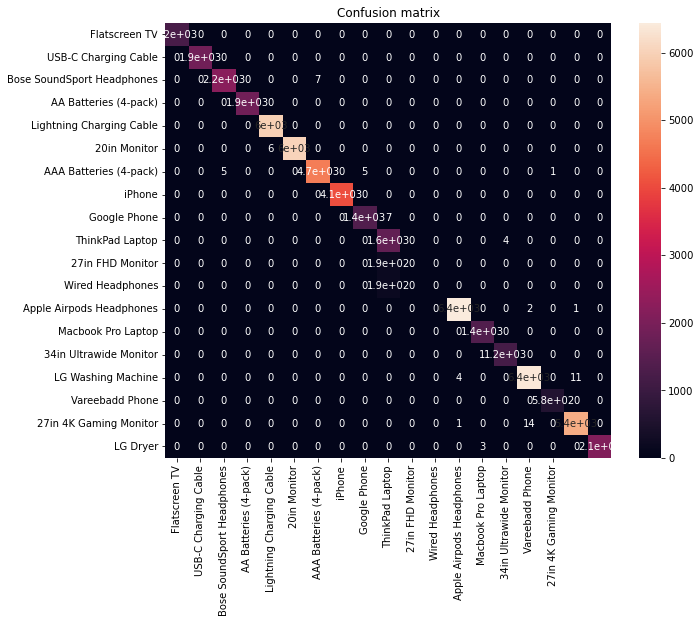

In [58]:
# Visualisation des produits présents et les produits futurs à mettre en vente  
plt.figure(figsize=(10,8))
sns.heatmap(metrics.confusion_matrix(etiq_test, yknn), annot=True, annot_kws={"size": 10}, xticklabels=['Flatscreen TV', 'USB-C Charging Cable',
       'Bose SoundSport Headphones', 'AA Batteries (4-pack)',
       'Lightning Charging Cable', '20in Monitor',
       'AAA Batteries (4-pack)', 'iPhone', 'Google Phone',
       'ThinkPad Laptop', '27in FHD Monitor', 'Wired Headphones',
       'Apple Airpods Headphones', 'Macbook Pro Laptop',
       '34in Ultrawide Monitor', 'LG Washing Machine', 'Vareebadd Phone',
       '27in 4K Gaming Monitor', 'LG Dryer'], 
            yticklabels=['Flatscreen TV', 'USB-C Charging Cable',
       'Bose SoundSport Headphones', 'AA Batteries (4-pack)',
       'Lightning Charging Cable', '20in Monitor',
       'AAA Batteries (4-pack)', 'iPhone', 'Google Phone',
       'ThinkPad Laptop', '27in FHD Monitor', 'Wired Headphones',
       'Apple Airpods Headphones', 'Macbook Pro Laptop',
       '34in Ultrawide Monitor', 'Vareebadd Phone',
       '27in 4K Gaming Monitor'])
plt.title('Confusion matrix')

# MERCI POUR VOTRE LECTURE